Представлен известный датасет “Титаник”, и вашей задачей будет обучить модель таким образом, чтобы  по определенным признакам была возможность максимально уверенно предсказать - выживет или умрёт пассажир (столбец “Survived”).

Здесь вы вольны делать что угодно. Я хочу видеть от вас:
1. Проверка наличия/обработка пропусков
2. Проверьте взаимосвязи между признаками
3. Попробуйте создать свои признаки
4. Удалите лишние
5. Обратите внимание на имена пассажиров. Подумайте, что можно извлечь полезного оттуда
6. Использование профайлера вам поможет.

Вспомните о всем, что я говорил на предыдущих занятиях. Не все будет пригодится, но в жизни вам никто не будет говорить, что использовать :)

Хорошим классификатором для этой задачи будет "Случайный лес" (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

Понимать суть работы "леса" не обязательно на данном этапе, но качество предсказаний будет выше, чем с линейным классификатором. (если желаете, вот гайд https://adataanalyst.com/scikit-learn/linear-classification-method/)

In [159]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as sts
import pandas as pd
import io
import requests
import seaborn as sns
%matplotlib inline
import statistics
import numpy as np

data_train = pd.read_csv('train.csv')
data_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [97]:
data_test = pd.read_csv('test.csv')
data_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [98]:
data_gender = pd.read_csv('gender_submission.csv')
data_gender.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

## 1. Проверка наличия/обработка пропусков

In [22]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [23]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [99]:
data_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare   Sex_class  
count  891.000000  891.000000  891.000000  
mean     0.381594   32.204208    1.352413  
std      0.806057   49.693429    0.477990  
min      0.000000    0.000000    1.000000  
25%      0.000000    7.910400    1.000000  
50%      0.000000   14.454200    1.000000  
75%      0.000000   31.000000    2.000000  
max      6.000000  512.329200    2.000000

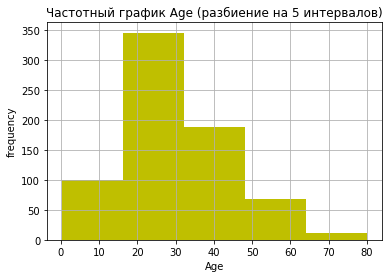

In [100]:
# Посмотрим на распределение Age, так как странно, что нет нулевых значений, но колиечство значений 714 (<891)

n, bins, patches = plt.hist(data_train['Age'], 5, facecolor='y')
plt.xlabel('Age')
plt.ylabel('frequency')
plt.title('Частотный график Age (разбиение на 5 интервалов)')
plt.grid(True)
plt.show()

In [101]:
Age_filtered = data_train[data_train['Age']=='   nan']
Age_filtered.head()
# нет нулевых и пустых значений

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Sex_class]
Index: []

In [102]:
data_train['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

Есть значения параметра "Age" = "   nan", так как ненулевых значений 791 (результаты data_train.describe()) - это большое количество наблюдений, мы можем не брать в расчет данные значения

In [103]:
data_train=data_train[data_train['Age']>0]
data_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Sex_class  
0      0         A/5 21171   7.2500   NaN        S          1  
1      0          PC 17599  71.2833   C85        C          2  
2      0  STON/O2. 3101282   7.9250   NaN        S          2  
3      0            113803  53.1000  C123        S          2  
4      0            373450   8.0500   NaN        S          1

In [104]:
data_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   714.000000  714.000000  714.000000  714.000000  714.000000   
mean    448.582633    0.406162    2.236695   29.699118    0.512605   
std     259.119524    0.491460    0.838250   14.526497    0.929783   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     222.250000    0.000000    1.000000   20.125000    0.000000   
50%     445.000000    0.000000    2.000000   28.000000    0.000000   
75%     677.750000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    5.000000   

            Parch        Fare   Sex_class  
count  714.000000  714.000000  714.000000  
mean     0.431373   34.694514    1.365546  
std      0.853289   52.918930    0.481921  
min      0.000000    0.000000    1.000000  
25%      0.000000    8.050000    1.000000  
50%      0.000000   15.741700    1.000000  
75%      1.000000   33.375000    2.000000  
max      6.000000  512.329200    2.000000

### Теперь можем считать, что пропусков в данных нет

## 2. Проверьте взаимосвязи между признаками

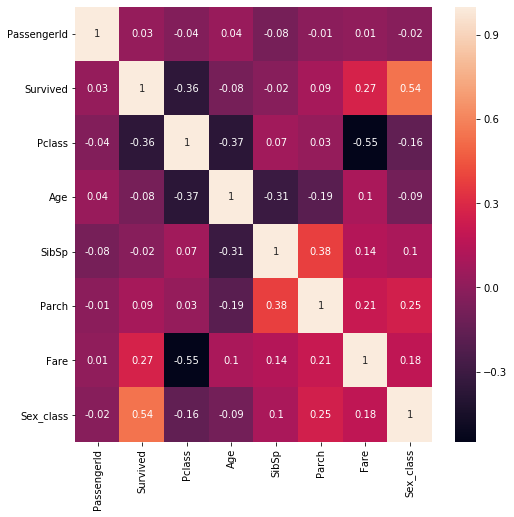

In [105]:
correlation_matrix = data_train.corr().round(2)
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(data=correlation_matrix, annot=True)

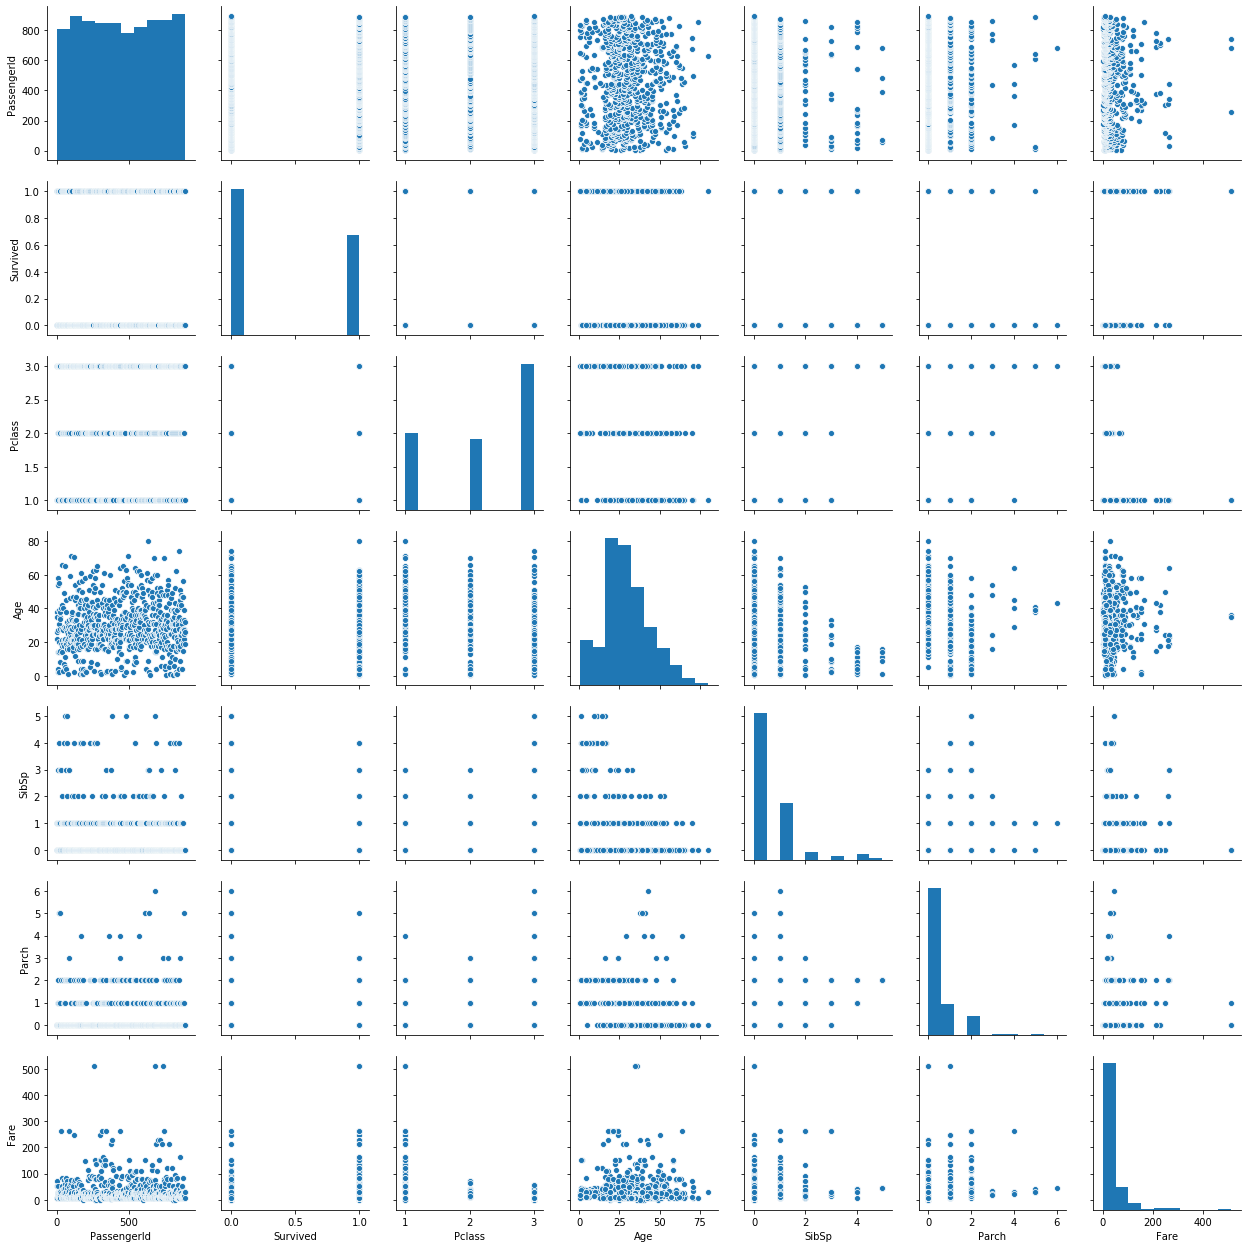

In [51]:
sns.pairplot(data_train)

### Судя по гистограммам и графикам попарной зависимости, а также по талице корреляций, можно сказать о том, что связь небольшая есть между параметрами Pclass-Survived,  Pclass-Fare, Pclass-Age. В целом, сильной корреляционной зависимости по Пирсону между признаками не наблюдается

## 3. Создание собственных переменных

In [135]:
# Первая собственная переменная - savings_chance (уровень выживаемости)
n_samples = 714
health_degree = np.random.choice(10, n_samples) + 1
weigth = np.random.choice(120, n_samples) + 3
savings_chance = health_degree + weigth*0.3
data_train['savings_chance']=pd.DataFrame({'savings_chance': savings_chance})
#data_train.head(5)

In [131]:
data_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [132]:
# Вторая собственная переменная - indurance_chance (шансы дождаться помощи)
Sex = data_train['Sex']
def sex_class(x):
        if x =='male':
            return 1
        elif x == 'female':
                return 2
        return 0
data_train['Sex_class'] = data_train['Sex'].apply(sex_class)
Sex_class = data_train['Sex_class']

n_samples = 714
warmth_water = np.random.choice(10, n_samples) + 1
indurance_chance = Sex_class*0.5 + warmth_water*1.5

data_train['indurance_chance']=pd.DataFrame({'indurance_chance': indurance_chance})
data_train.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Sex_class  savings_chance  \
0      0         A/5 21171   7.2500   NaN        S          1            22.8   
1      0          PC 17599  71.2833   C85        C          2            29.3   
2      0  STON/O2. 3101282   7.9250   NaN        S          2            34.2   
3      0            113803  53.1000  C123        S          2            36.9   
4      0            373450   8.0500   NaN        S          1            22.3   

   indurance_chance  
0               2.0  
1               4.0  
2               5.5  
3              14.5  
4               6.5

## 4. Удаление лишних переменных

Удалю переменные:
    
Ticket - так как номер билета, вряд ли будет влиять, или в любом случае класс билета в модели будет определять  переменная Fare (плата за проезд) и Pclass (класс пассажира)

Sex - заменила переменной Sex_class

Cabin - влияние номера кабины (класс, уровень палубы) отражается уже в переменной Fare и Pclass

Embarked - порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон), скорее всего не влияет на то, выживет ли человек, после того, как все пассажиры на борту

In [111]:
data_train_2 = data_train.drop('Cabin', axis=1)
data_train_3 = data_train_2.drop('Sex', axis=1)
data_train_4 = data_train_3.drop('Ticket', axis=1)
data_train_5 = data_train_4.drop('Embarked', axis=1)
data_train_6 = data_train_5.drop('PassengerId', axis=1)
data_train_6.head()

Survived  Pclass                                               Name   Age  \
0         0       3                            Braund, Mr. Owen Harris  22.0   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0   
2         1       3                             Heikkinen, Miss. Laina  26.0   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0   
4         0       3                           Allen, Mr. William Henry  35.0   

   SibSp  Parch     Fare  Sex_class  savings_chance  indurance_chance  
0      1      0   7.2500          1            34.0              11.0  
1      1      0  71.2833          2            20.0              10.0  
2      0      0   7.9250          2            23.6               8.5  
3      1      0  53.1000          2             9.0              13.0  
4      0      0   8.0500          1            25.7              11.0

In [136]:
# Удаление дубликатов
data_train_6.drop_duplicates().shape

(714, 10)

In [137]:
data_train_6['Survived'].unique()
data_train_6['Pclass'].unique()
data_train_6['Age'].unique()
data_train_6['SibSp'].unique()
data_train_6['Parch'].unique()
data_train_6['Fare'].unique()
data_train_6['Sex_class'].unique()
data_train_6['savings_chance'].unique()

array([34. , 20. , 23.6,  9. , 25.7, 39.4, 13.6, 20.9, 11.5, 23.2, 14.7,
       17. , 46.6, 36. , 10.8, 32.6, 14.6, 12.8, 10.5, 17.7, 12. , 12.7,
       39. , 30.9, 40.2, 29.8, 23.8, 37.7, 30.2, 26.9, 24.5, 21.5, 23.4,
       43.4, 36.3, 32.8, 39.9,  8. , 24.8, 21.9,  8.5, 27.8, 24.2, 43.5,
       15.2, 29.2, 20.5,  6.9, 13.4, 31.3, 35.9, 38.9, 30.1, 11. , 40. ,
       14.2, 27.3,  5.5, 32.5, 26.6, 42.7, 30.5, 19.2, 32.2, 15. , 16.6,
       42.2,  4.8, 38.4,  8.4, 26.1, 22.2, 36.2, 41.6, 28.8, 39.3, 41. ,
       26.3, 17.2, 31.6, 13. , 33.9, 35.6, 18.5, 18.1, 37.6, 10.7, 34.2,
        9.2, 24.1, 43.9, 27.9,  5.9, 38.6, 42.4, 43.6, 17.3,  7.9, 24. ,
       43.2, 32. , 13.5, 35.8,  9.8, 28.3, 23.9, 23.6, 31.9, 34.3, 44.8,
       18.1, 29.6, 14.8, 34.9,  8.7, 22.6, 32.1, 45.6, 33.2, 26.2, 42. ,
       21.6, 10. , 30.4, 10.6, 17.8, 26.7, 40.1, 12.5, 19.3, 20.6,  8.3,
       29.8, 11.7, 29.1, 17.6, 44.1, 35.3, 31. , 25.6,  8.8, 18. , 19.5,
       32.9, 38.3, 37.9, 28.4, 21.7, 37.2,  3.8,  7

In [128]:
data_train_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 10 columns):
Survived            714 non-null int64
Pclass              714 non-null int64
Name                714 non-null object
Age                 714 non-null float64
SibSp               714 non-null int64
Parch               714 non-null int64
Fare                714 non-null float64
Sex_class           714 non-null int64
savings_chance      567 non-null float64
indurance_chance    714 non-null float64
dtypes: float64(4), int64(5), object(1)
memory usage: 61.4+ KB


Несмотря на то, что функция info() говорит, что пропусков нет, среди уникальных значений data_train_6['savings_chance'] есть значения 'nan'. Заменим их га среднее зхначение

In [162]:
data_train_6['savings_chance'].fillna((data_train_6['savings_chance'].mean()), inplace=True)
data_train_6['savings_chance']=data_train_6['savings_chance'].astype(int)
data_train_6['savings_chance'].unique()
#data_train_6['savings_chance'].fillna(data['savings_chance'].mode()[0], inplace = True)

array([34, 20, 23,  9, 25, 39, 13, 11, 14, 17, 46, 36, 10, 32, 12, 30, 40,
       29, 37, 26, 24, 21, 43,  8, 27, 15,  6, 31, 35, 38,  5, 42, 19, 16,
        4, 22, 41, 28, 33, 18,  7, 44, 45,  3,  2])

## 5. Построение модели и выбор той, которая наиболее точно может предсказать - выживет или умрёт пассажир (столбец “Survived”)

### 1. Построим линейную регресиию используя классическое разделение обучаемой и тестовой выборки - 70/30

In [165]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
# X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=30)

X = data_train_6[['Pclass', 'Age', 'SibSp','Parch','Fare','Sex_class','savings_chance','indurance_chance']]
y = data_train_6['Survived']

estimator = LinearRegression()
estimator.fit(X_train, y_train) # Обучение

y_pred = estimator.predict(X_test)

print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: \t", mean_absolute_error(y_test, y_pred))
print("Коэффициенты регрессии: ",estimator.coef_)
print("Свободный коэффициент: ",estimator.intercept_)

print('Точность предсказания модели: ', estimator.score(X_test, y_test))

R2: 	 0.33941618662898587
RMSE: 	 0.3967176897527819
MAE: 	 0.31298947808302796
Коэффициенты регрессии:  [-2.03642868e-01 -7.21923772e-03 -5.46281040e-02 -2.01036891e-02
  2.48823399e-04  4.85791050e-01 -1.25350135e-03  3.89448376e-03]
Свободный коэффициент:  0.4420285525572795
Точность предсказания модели:  0.33941618662898587


Низкое значение R^2, точность предсказания данной модели низкая

### 2. Построим логистическую регресиию используя классическое разделение обучаемой и тестовой выборки - 70/30

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size = 0.3,#%70 train, 30% test
                                                 random_state = 3)
X = data_train_6[['Pclass', 'Age', 'SibSp','Parch','Fare','Sex_class','savings_chance','indurance_chance']]
y = data_train_6['Survived']

model = LogisticRegression()
model.fit(X_train, y_train)
predicted_classes = model.predict(X_test)
accuracy = accuracy_score(y_test,predicted_classes)
print('Точность предсказания модели: ', accuracy)
parameters = model.coef_
print('slope:', model.coef_)

Точность предсказания модели:  0.8232558139534883
slope: [[-1.13144673e+00 -4.29045530e-02 -4.24541906e-01 -1.06016415e-01
   2.00786694e-03  2.58049242e+00 -3.39884906e-03 -1.43061206e-02]]


/Users/tanyamak/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Точность предсказания модели логистической регресиии высокая - 0.82, однако все коэффициенты очень малы

### 3. Построим модель используя инструмент "Случайный лес"

In [173]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=714, n_features=8,n_informative=2, n_redundant=0, random_state=0, shuffle=False)
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf.fit(X, y)  
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
print('Значимость признаков: ',clf.feature_importances_)
print('Точность модели:', clf.score(X, y))

Значимость признаков:  [0.2134867  0.40453794 0.07856409 0.06716542 0.05924088 0.04939725
 0.08051252 0.04709521]
Точность модели: 0.8935574229691877


Точность модели "Случайный лес" - 0.89 - выше точности предыдущих моделей. Можно использовать ее для предсказания вероятности выживания пассажира